In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
C = pd.read_csv('Compilation_normalised.csv')
Crime_Rate = pd.read_csv('Crime_noout.csv')
Facility_Tally = pd.read_csv('Facility_noout.csv')
Greenspace_area = pd.read_csv('Greena_noout.csv')
Response_Time = pd.read_csv('ResponseTime_noout.csv')
School_Tally = pd.read_csv('School_noout.csv')
C = C.drop('Unnamed: 0', 1)

i = 0
compares_category = [Crime_Rate, Facility_Tally, Greenspace_area, Response_Time, School_Tally]
index_name = ['Crime Rate No Outlier', 'Facility No Outlier', 'Greena No Outlier', 'Response Time No Outlier', 'School No Outlier']
r2 = []
for category in compares_category:
    x = list(category['Median Price'])
    y = list(category[index_name[i]])
    corr_matrix = np.corrcoef(x, y)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    r2.append((R_sq, index_name[i]))
    i += 1
r2


[(0.15317139256850995, 'Crime Rate No Outlier'),
 (0.08672980072093568, 'Facility No Outlier'),
 (0.22673794728720978, 'Greena No Outlier'),
 (0.2071608188134929, 'Response Time No Outlier'),
 (0.0019996094324007596, 'School No Outlier')]

In [3]:
nmi = [0.9919028123572338, 0.969466990039968, 0.6447755861424472, 0.9857433425019687, 0.9072602417922371]
C['living standard LR'] =  float(r2[0][0])*C['Crime Rate'] + float(r2[1][0])*C['Facility Tally'] + float(r2[2][0])*C['Greenspace_area'] + float(r2[3][0])*C['Response Time'] + float(r2[4][0])*C['School Tally']
C['living standard NMI'] =  float(nmi[0])*C['Crime Rate'] + float(nmi[1])*C['Facility Tally'] + float(nmi[2])*C['Greenspace_area'] + float(nmi[3])*C['Response Time'] + float(nmi[4])*C['School Tally']




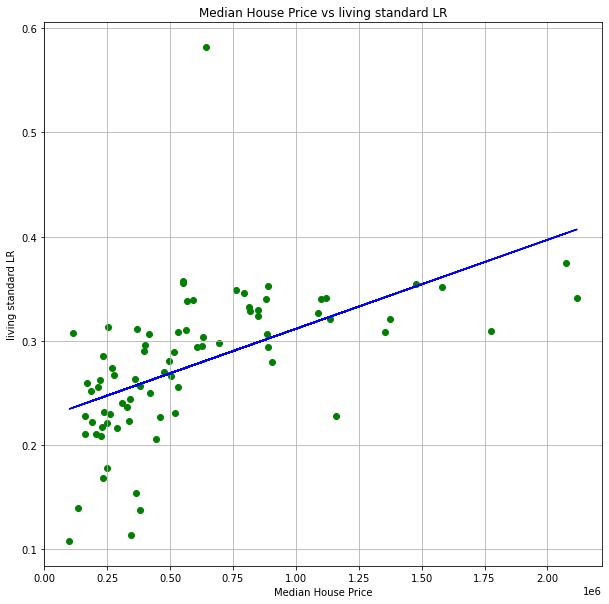

0.5391386651851099

In [4]:
plt.figure(figsize=(10,10))
x = C['Median House Price']
y = C['living standard LR']

parameter = np.polyfit(x, y, 1)

p = np.poly1d(parameter)
plt.scatter(x, y, color = 'green')
plt.plot(x, p(x), color = 'blue')

plt.xlabel("Median House Price")
plt.ylabel("living standard LR")
plt.title("Median House Price vs living standard LR")
plt.grid(True)

plt.show()

# pearson correlation
abs(x.corr(y))

In [5]:
xx = list(C['Median House Price'])
yy = list(C['living standard LR'])
corr_matrix1 = np.corrcoef(xx, yy)
corr1 = corr_matrix1[0,1]
R_sqLR = corr1**2
R_sqLR

0.290670500297582

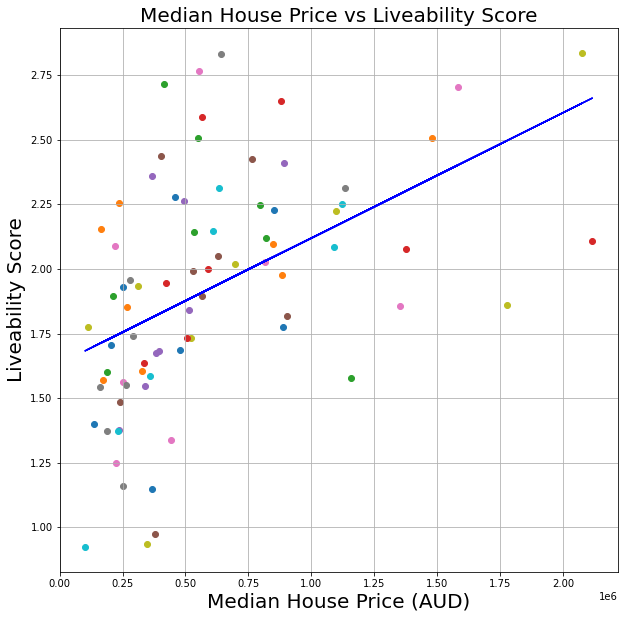

[4.85571508e-07 1.63411194e+00]
 
4.856e-07 x + 1.634


In [6]:
plt.figure(figsize=(10,10))
x = C['Median House Price']
y = C['living standard NMI']

parameter = np.polyfit(x, y, 1)

p = np.poly1d(parameter)
plt.plot(x, p(x), color = 'blue')

plt.xlabel("Median House Price (AUD)").set_size(20)
plt.ylabel("Liveability Score").set_size(20)
plt.title("Median House Price vs Liveability Score").set_size(20)
for i, label in enumerate(C['lga']):
    plt.scatter(x[i], y[i])

plt.grid(True)
plt.savefig('HPvsLSnmi_nolabels.png')
plt.show()

# pearson correlation
abs(x.corr(y))
print(parameter)
print(p)

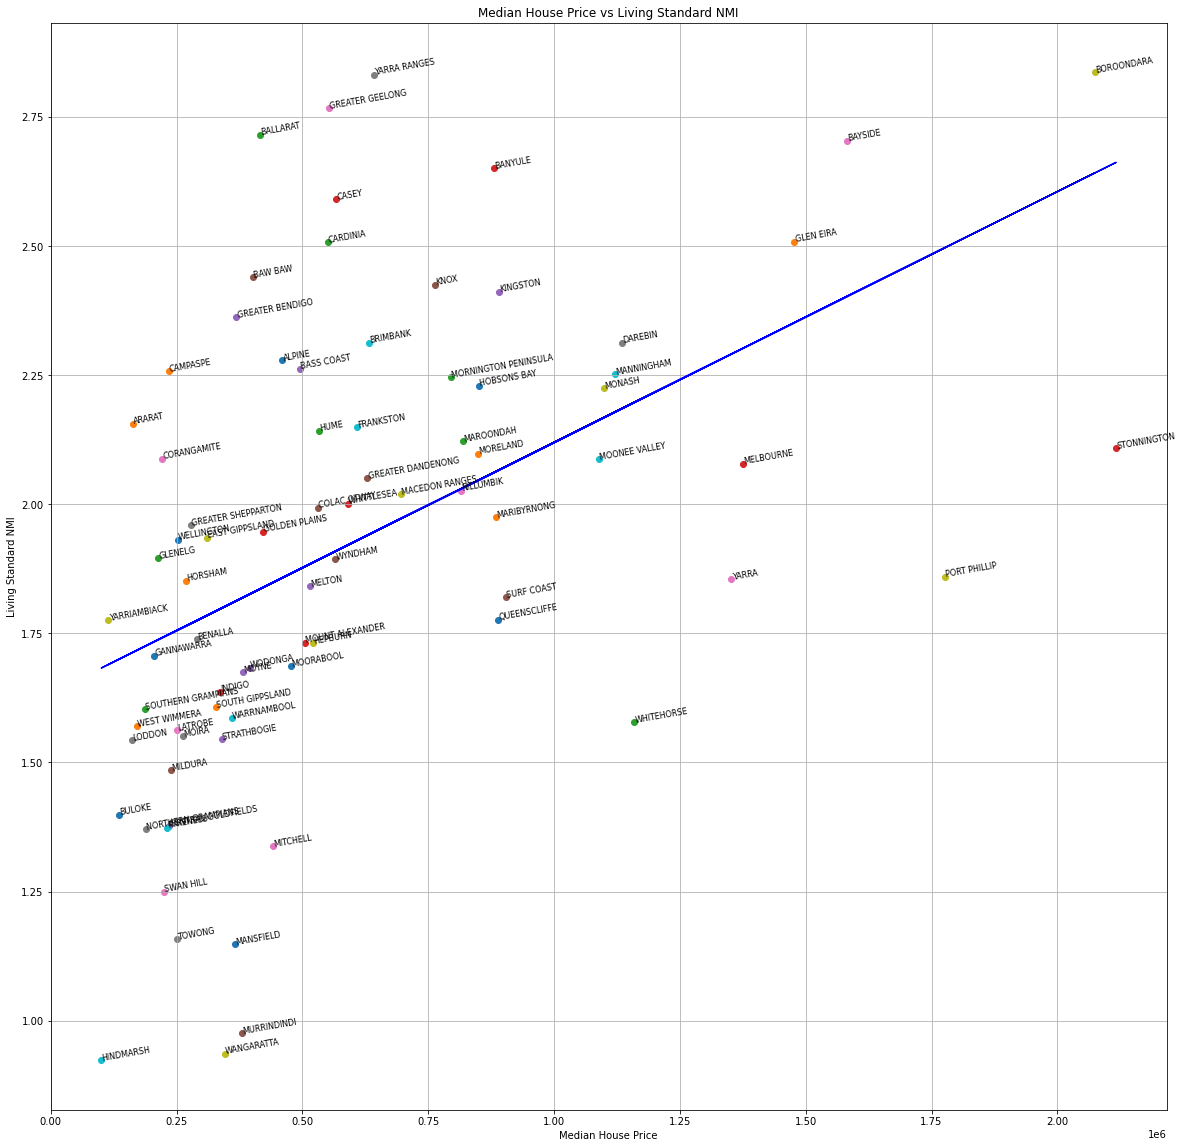

[4.85571508e-07 1.63411194e+00]
 
4.856e-07 x + 1.634


In [7]:
plt.figure(figsize=(20,20))
x = C['Median House Price']
y = C['living standard NMI']

parameter = np.polyfit(x, y, 1)

p = np.poly1d(parameter)
plt.plot(x, p(x), color = 'blue')

plt.xlabel("Median House Price")
plt.ylabel("Living Standard NMI")
plt.title("Median House Price vs Living Standard NMI")
for i, label in enumerate(C['lga']):
    plt.scatter(x[i], y[i])
    plt.annotate(label, (x[i], y[i]), rotation = 10).set_size(8)

plt.grid(True)
plt.savefig('HPvsLSnmi_labels.png')
plt.show()

# pearson correlation
abs(x.corr(y))
print(parameter)
print(p)

In [8]:
xxx = list(C['Median House Price'])
yyy = list(C['living standard NMI'])
corr_matrix1 = np.corrcoef(xxx, yyy)
corr1 = corr_matrix1[0,1]
R_sqNMI = corr1**2
R_sqNMI

0.2319610208224339

In [9]:
C.to_csv('house_price+stats+lsscore.csv', index=False)
